In [25]:
import pandas as pd

In [ ]:
results = pd.read_csv("mutpy_results.csv")
results

Test Name            Target Name  \
0                 test_deepseek_coder_100_doors           100_doors.py   
1             test_gemini_1_5_pro_002_100_doors           100_doors.py   
2              test_gpt_4o_2024_08_06_100_doors           100_doors.py   
3             test_deepseek_coder_100_prisoners       100_prisoners.py   
4         test_gemini_1_5_pro_002_100_prisoners       100_prisoners.py   
..                                          ...                    ...   
565   test_gemini_1_5_pro_002_mac_vendor_lookup   mac_vendor_lookup.py   
566    test_gpt_4o_2024_08_06_mac_vendor_lookup   mac_vendor_lookup.py   
567      test_deepseek_coder_md5_implementation  md5_implementation.py   
568  test_gemini_1_5_pro_002_md5_implementation  md5_implementation.py   
569   test_gpt_4o_2024_08_06_md5_implementation  md5_implementation.py   

    Run Result  
0            0  
1          254  
2            0  
3            0  
4            0  
..         ...  
565          0  
566          0  
567          0  
568          0  
569          0  

[570 rows x 3 columns]

In [42]:
results["Run Result"].value_counts()

Run Result
0          350
TIMEOUT     95
1           77
254         48
Name: count, dtype: int64

In [43]:
def get_task_dir_name(target_file):
    return target_file.split(".")[0]

def convert_to_python_filename(task_name):
    snake_case = "_".join(re.split(r'[^a-zA-Z0-9]+', task_name.lower()))
    return snake_case + ".py"

def get_llm_model_name(filename):
    for model_name in ["deepseek_coder", "gpt_4o_2024_08_06", "gemini_1_5_pro"]:
        if model_name in filename:
            return model_name

In [44]:
results["llm_model"] = results["Test Name"].apply(get_llm_model_name)
results

Test Name            Target Name  \
0                 test_deepseek_coder_100_doors           100_doors.py   
1             test_gemini_1_5_pro_002_100_doors           100_doors.py   
2              test_gpt_4o_2024_08_06_100_doors           100_doors.py   
3             test_deepseek_coder_100_prisoners       100_prisoners.py   
4         test_gemini_1_5_pro_002_100_prisoners       100_prisoners.py   
..                                          ...                    ...   
565   test_gemini_1_5_pro_002_mac_vendor_lookup   mac_vendor_lookup.py   
566    test_gpt_4o_2024_08_06_mac_vendor_lookup   mac_vendor_lookup.py   
567      test_deepseek_coder_md5_implementation  md5_implementation.py   
568  test_gemini_1_5_pro_002_md5_implementation  md5_implementation.py   
569   test_gpt_4o_2024_08_06_md5_implementation  md5_implementation.py   

    Run Result          llm_model  
0            0     deepseek_coder  
1          254     gemini_1_5_pro  
2            0  gpt_4o_2024_08_06  
3            0     deepseek_coder  
4            0     gemini_1_5_pro  
..         ...                ...  
565          0     gemini_1_5_pro  
566          0  gpt_4o_2024_08_06  
567          0     deepseek_coder  
568          0     gemini_1_5_pro  
569          0  gpt_4o_2024_08_06  

[570 rows x 4 columns]

In [45]:
results.groupby(['llm_model', 'Run Result']).size().reset_index(name='count')

llm_model Run Result  count
0      deepseek_coder          0    116
1      deepseek_coder          1     23
2      deepseek_coder        254     13
3      deepseek_coder    TIMEOUT     30
4      gemini_1_5_pro          0    113
5      gemini_1_5_pro          1     30
6      gemini_1_5_pro        254     18
7      gemini_1_5_pro    TIMEOUT     35
8   gpt_4o_2024_08_06          0    121
9   gpt_4o_2024_08_06          1     24
10  gpt_4o_2024_08_06        254     17
11  gpt_4o_2024_08_06    TIMEOUT     30

In [39]:
import matplotlib.pyplot as plt

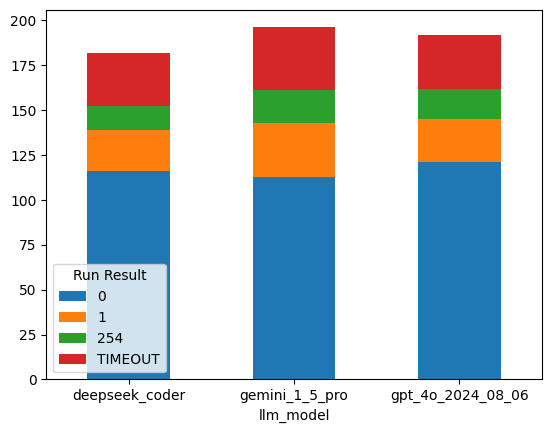

In [47]:
results.groupby(['llm_model', 'Run Result']).size().reset_index(name='count').pivot_table(index='llm_model', columns='Run Result', values='count').plot(kind='bar', stacked=True, rot=0)
plt.savefig("mutation_analysis_exit_codes_stats.png", bbox_inches='tight')

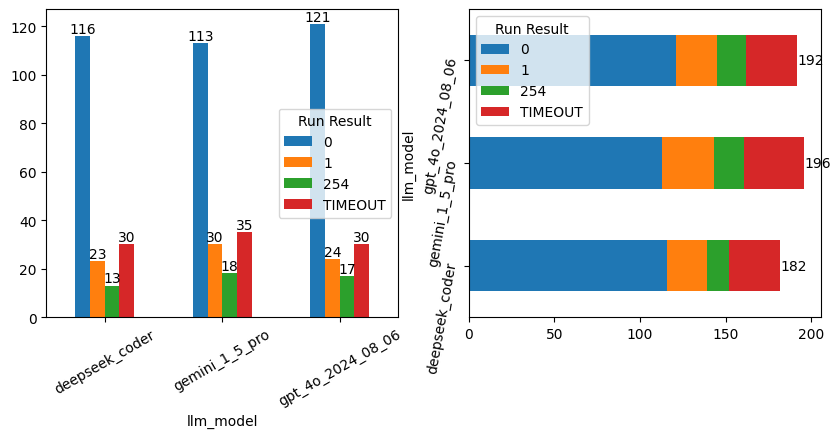

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))  # You can adjust figsize

stats_df = results.groupby(['llm_model', 'Run Result']).size().reset_index(name='count').pivot_table(index='llm_model', columns='Run Result', values='count')
ax = stats_df.plot(kind='bar', ax=axes[0], rot=30)

for container in ax.containers:
    ax.bar_label(container)

ax = stats_df.plot(kind='barh', ax=axes[1], stacked=True, rot=80)
ax.bar_label(ax.containers[-1])
plt.savefig("mutation_analysis_exit_codes_stats_per_model", bbox_inches='tight')